In [35]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np 

In [36]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [37]:
X_train = X_train / 255
x_test = X_test / 255

In [38]:
X_train[4].shape

(28, 28)

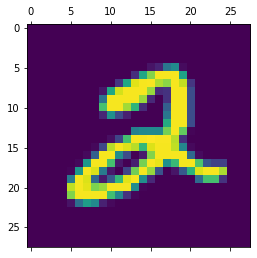

In [39]:
plt.matshow(X_train[5])

In [40]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [41]:
X_train_flattened[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer='adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.fit(X_train_flattened,y_train, epochs=5, callbacks=[tb_callback])

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4659 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 2s 903us/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 936us/step - loss: 0.2837 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 918us/step - loss: 0.2663 - accuracy: 0.9258


In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 594us/step - loss: 47.8196 - accuracy: 0.9136


[47.819576263427734, 0.9136000275611877]

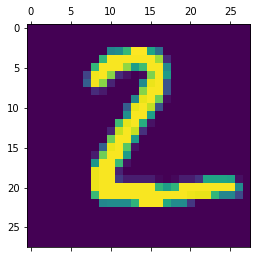

In [29]:
plt.matshow(X_test[1])

In [30]:
y_predict = model.predict(X_test_flattened)
y_predict_lables = [np.argmax(i) for i in y_predict]

In [31]:
np.argmax(y_predict[1])

2

In [32]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_lables)

Text(69.0, 0.5, 'Truth')

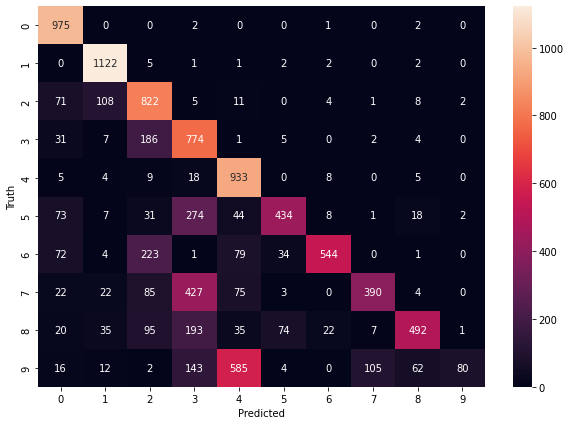

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
 %load_ext tensorboard
 %tensorboard --logdir logs/fit
 %reload_ext tensorboard




The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 23508), started 0:01:37 ago. (Use '!kill 23508' to kill it.)